In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


# Importing the Libraries

In [2]:
#packages
#basics
import os
import numpy as np
import pandas as pd

#images
import cv2

#modeling
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,BatchNormalization,MaxPool2D,Input,MaxPooling2D

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [3]:
train_data_csv = '/content/drive/MyDrive/Machine Learning: 589/Project/train.csv'
test_data_csv  = '/content/drive/MyDrive/Machine Learning: 589/Project/test.csv'
train_folder = '/content/drive/MyDrive/Machine Learning: 589/Project/train'
test_folder  = '/content/drive/MyDrive/Machine Learning: 589/Project/test'
train_df = pd.read_csv(train_data_csv)
test_df = pd.read_csv(test_data_csv)
train = train_df.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)
test = test_df.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)


In [4]:
def train_path(x):
    return '/content/drive/MyDrive/Machine Learning: 589/Project/train/' + x + ".jpg"
def test_path(x):
    return '/content/drive/MyDrive/Machine Learning: 589/Project/test/' + x + ".jpg"

In [5]:
train["path"] = train["Id"].apply(train_path)
test["path"] = test["Id"].apply(test_path)

In [6]:
def load_img(image_path):
    raw = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(raw, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (128, 128))
    return image


In [ ]:
X = []
scores = []
for img in range(len(train)):
  X.append(load_img(train.iloc[img]['path']))
  scores.append(train.iloc[img]['Pawpularity'])
  if img%100 == 0:
    print(img)
print(type(X),len(X))


In [8]:
X = np.array(X)
scores = np.array(scores)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, scores, test_size=0.2, shuffle = True)

# Architecture of the Model

In [11]:
inputs=keras.Input(shape=(128,128,3))
x=inputs
x=keras.layers.Conv2D(filters=16,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=128,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(128, activation = "relu")(x)
x=keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048

# Compiling and Training the Model

In [87]:
model.compile(loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

In [71]:
data_augmentation = ImageDataGenerator()
history = model.fit(
    data_augmentation.flow(X_train,Y_train,batch_size=32),
    validation_data = (X_val,Y_val),
    steps_per_epoch = len(X_train) // 32,
    epochs = 20
)


Epoch 1/20
247/247 [==============================] - 6s 21ms/step - loss: 541.7267 - rmse: 23.2750 - mae: 17.2847 - mape: 79.5284 - val_loss: 422.2872 - val_rmse: 20.5496 - val_mae: 15.1851 - val_mape: 75.0841
Epoch 2/20
247/247 [==============================] - 4s 17ms/step - loss: 459.6100 - rmse: 21.4385 - mae: 16.0168 - mape: 79.6473 - val_loss: 433.3282 - val_rmse: 20.8165 - val_mae: 14.8448 - val_mape: 68.8024
Epoch 3/20
247/247 [==============================] - 4s 17ms/step - loss: 455.9350 - rmse: 21.3526 - mae: 15.9166 - mape: 77.9752 - val_loss: 421.2057 - val_rmse: 20.5233 - val_mae: 15.5930 - val_mape: 80.0428
Epoch 4/20
247/247 [==============================] - 4s 16ms/step - loss: 454.2417 - rmse: 21.3129 - mae: 15.8980 - mape: 78.8353 - val_loss: 427.6042 - val_rmse: 20.6786 - val_mae: 14.8804 - val_mape: 70.4374
Epoch 5/20
247/247 [==============================] - 4s 16ms/step - loss: 454.2149 - rmse: 21.3123 - mae: 15.8840 - mape: 78.9360 - val_loss: 436.9916 - va

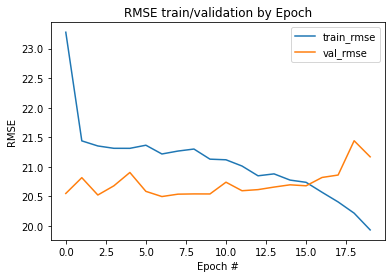

In [72]:
plt.figure()
plt.plot(history.history["rmse"], label="train_rmse")
plt.plot(history.history["val_rmse"], label="val_rmse")
#plt.xticks(range(0,60))
plt.title("RMSE train/validation by Epoch")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

Epoch 1/20
247/247 [==============================] - 7s 23ms/step - loss: 497.7704 - rmse: 22.3108 - mae: 16.5961 - mape: 79.0074 - val_loss: 434.7021 - val_rmse: 20.8495 - val_mae: 16.4513 - val_mape: 87.4302
Epoch 2/20
247/247 [==============================] - 5s 18ms/step - loss: 455.8697 - rmse: 21.3511 - mae: 15.8848 - mape: 78.4986 - val_loss: 418.9350 - val_rmse: 20.4679 - val_mae: 15.3675 - val_mape: 77.6451
Epoch 3/20
247/247 [==============================] - 5s 18ms/step - loss: 444.2354 - rmse: 21.0769 - mae: 15.7448 - mape: 78.7534 - val_loss: 419.8472 - val_rmse: 20.4902 - val_mae: 15.5531 - val_mape: 79.6274
Epoch 4/20
247/247 [==============================] - 5s 19ms/step - loss: 444.4375 - rmse: 21.0817 - mae: 15.7331 - mape: 79.5458 - val_loss: 420.0584 - val_rmse: 20.4953 - val_mae: 15.6451 - val_mape: 80.6382
Epoch 5/20
247/247 [==============================] - 5s 19ms/step - loss: 442.6652 - rmse: 21.0396 - mae: 15.6867 - mape: 79.0945 - val_loss: 421.5376 - va

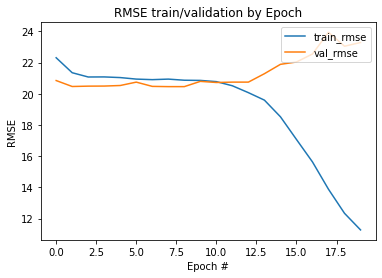

In [88]:
data_augmentation = ImageDataGenerator()
history = model.fit(
    data_augmentation.flow(X_train,Y_train,batch_size=32),
    validation_data = (X_val,Y_val),
    steps_per_epoch = len(X_train) // 32,
    epochs = 20
)
plt.figure()
plt.plot(history.history["rmse"], label="train_rmse")
plt.plot(history.history["val_rmse"], label="val_rmse")
#plt.xticks(range(0,60))
plt.title("RMSE train/validation by Epoch")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

## Analysing the MetaData

In [10]:
scores = np.zeros((9912,))
for img in range(len(train)):
  scores[img]=train.iloc[img]['Pawpularity']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, scores, test_size=0.2, shuffle = True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle = True)

In [13]:
X_train.shape

(6343, 3)

In [14]:
def load_image( path):
      raw = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(raw, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (224,224))
    return image

In [19]:
def splits(X_data):
  X = np.zeros((len(X_data),224,224,3))
  for img in range(len(X_data)):
    X[img]=load_image(X_data.iloc[img]['path'])
    if img%100 == 0:
      print(img)

In [ ]:
splits(X_train)

In [ ]:
preprocess_train = []
preprocess_train.append(train['path'][0:4].apply(load_image))


NameError: ignored

In [2]:
import numpy as np

In [3]:
X = np.zeros((6000,224,224,3))
scores = np.zeros((9912,))
for img in range(len(train)):
  X[img]=load_image(train.iloc[img]['path'])
  scores[img]=train.iloc[img]['Pawpularity']
  if img%100 == 0:
    print(img)

NameError: ignored

In [ ]:
X = np.array(X)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, scores, test_size=0.2, shuffle = True)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle = True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator()
data_generator.fit(X)
train_gen = data_generator.flow(x=X_train, y=Y_train)
val_gen = data_generator.flow(x=X_val, y=Y_val)

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
                  
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))

conv_base.trainable = False

In [ ]:
model.compile(loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

In [ ]:
model.fit(train_gen,validation_data=val_gen, epochs=50,verbose=1)